<a href="https://colab.research.google.com/github/Pablix17/Inteligencia-Artificial-2023/blob/main/Parcial_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial Final Practico

## Preparación del Entorno en PyCaret:

Instalación PyCaret y carga del conjunto de datos de Pokémon.

In [ ]:
!pip install pycaret[analysis] --quiet
!pip install shap --quiet
!pip install interpret-community --quiet

from pycaret.datasets import get_data
data = get_data('pokemon')


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
interpret-community 0.30.0 requires interpret-core[required]<=0.4.3,>=0.1.20, but you have interpret-core 0.4.4 which is incompatible.
interpret-community 0.30.0 requires shap<=0.41.0,>=0.20.0, but you have shap 0.43.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainerdashboard 0.4.3 requires shap>=0.42.1, but you have shap 0.41.0 which is incompatible.
interpret 0.4.4 requires interpret-core[dash,debug,decisiontree,ebm,lime,linear,notebook,plotly,required,sensitivity,shap,skoperules,treeinterpreter]==0.4.4, but you have interpret-core 0.4.3 which is incompatible.


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Análisis Exploratorio de Datos:

Inspección del conjunto de datos, conocer la información contenida en el dataset, para conocer si hay datos faltantes.

In [ ]:
print(data.info)
missing_values = data.isnull().sum()
print(missing_values)

<bound method DataFrame.info of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp

Se logra ver que solo tipo dos tiene datos faltantes, los demás están completos. A continuación se evidencia de los datos categóricos cuantos hay de cada clase.

In [ ]:
conteo_Type1 = data['Type 1'].value_counts()
print(conteo_Type1)
print("------------------------------------------")
conteo_Type2 = data['Type 2'].value_counts()
print(conteo_Type2)
print("------------------------------------------")
conteo_gen = data['Generation'].value_counts()
print(conteo_gen)
print("------------------------------------------")
conteo_Leg = data['Legendary'].value_counts()
print(conteo_Leg)
print("------------------------------------------")

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
------------------------------------------
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64
------------------------------------------
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64
------------------------------------------
False    735
True      65
Name: Legendary, dtype: int64
------------------------------------------


## Configuración PyCaret:

En este instante se seleccionan las características del Pokémon que han de ser empleadas para entrenar el clasificador, en el caso de los datos numéricos se seleccionan la mayoría de características, salvo la generación, dado que no es un factor determinante en la clasificación, por otro lado, se aclara que los datos categóricos no sean tenidos en cuenta, lo anterior con el fin de entrenar un clasificador meramente dependiente de las estadísticas de combate.

Para el número de pliegues, se determinó que sean 5, de tal manera que el modelo entrenado sea lo suficiente robusto y un rendimiento aceptable.

In [ ]:
from pycaret.classification import setup, create_model, tune_model, plot_model, evaluate_model, interpret_model ,compare_models
features = ['Total','#','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
categorical_features_to_ignore = ['Type 1', 'Type 2', 'Name']
exp_clf = setup(data, target='Legendary',numeric_features=features, ignore_features=categorical_features_to_ignore, fold=5)


,Description,Value
0,Session id,4198
1,Target,Legendary
2,Target type,Binary
3,Original data shape,"(800, 13)"
4,Transformed data shape,"(800, 10)"
5,Transformed train set shape,"(560, 10)"
6,Transformed test set shape,"(240, 10)"
7,Ignore features,3
8,Numeric features,8
9,Rows with missing values,48.2%




> Bloque con sangría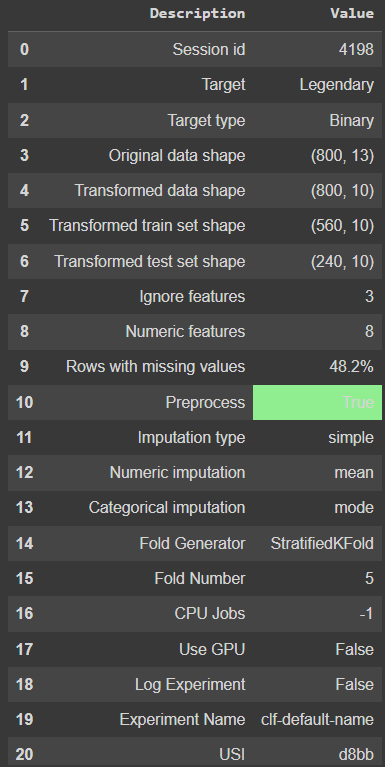



## Comparación de modelos

Luego de probar en repetidas ocasiones los modelos y comparar sus desempeños, se evidencia que K vecinos más cercanos en todas las métricas cuenta con un buen desempeño, siendo así un modelo confiable, por ello es el modelo seleccionado para este trabajo.

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9732,0.9909,0.8911,0.8118,0.8454,0.8309,0.8345,0.3000
rf,Random Forest Classifier,0.9679,0.9891,0.7822,0.8300,0.7980,0.7807,0.7852,0.6280
ada,Ada Boost Classifier,0.9679,0.9807,0.8244,0.7942,0.8066,0.7891,0.7907,0.2720
dt,Decision Tree Classifier,0.9643,0.9017,0.8267,0.7718,0.7926,0.7732,0.7771,0.1200
lda,Linear Discriminant Analysis,0.9643,0.9802,0.7400,0.8109,0.7656,0.7466,0.7521,0.0420
lightgbm,Light Gradient Boosting Machine,0.9643,0.9870,0.8244,0.7742,0.7912,0.7718,0.7766,0.1660
xgboost,Extreme Gradient Boosting,0.9607,0.9877,0.7844,0.7702,0.7694,0.7481,0.7527,0.0800
lr,Logistic Regression,0.9554,0.9835,0.6778,0.7556,0.6988,0.6755,0.6853,1.8480
knn,K Neighbors Classifier,0.9536,0.9610,0.5889,0.8220,0.6560,0.6332,0.6585,0.1880
et,Extra Trees Classifier,0.9518,0.9713,0.5867,0.7729,0.6509,0.6262,0.6414,0.2080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4198, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

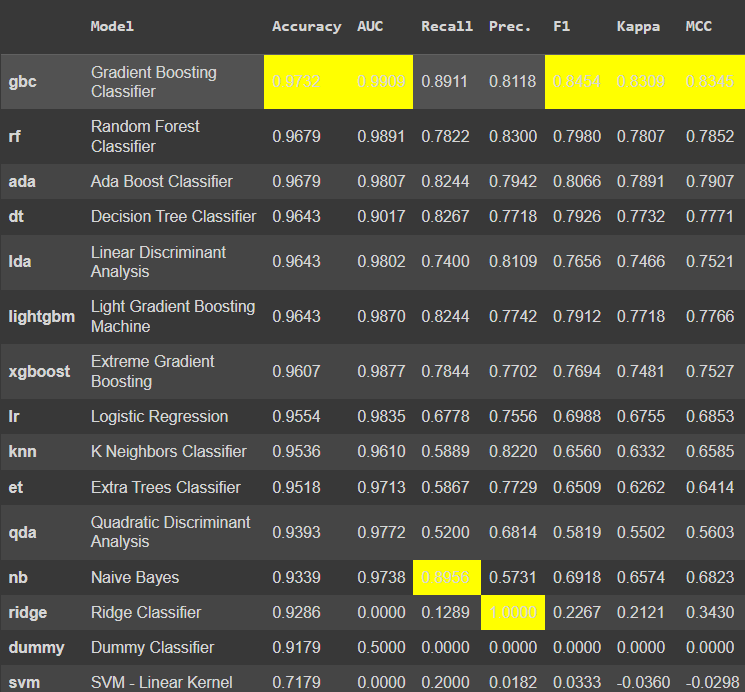

## Creación y Optimización de Modelos:

A continuación se genera el modelo de knn y posteriormente se realiza su optimización.

In [ ]:
knn_model = create_model('knn',fold=9)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9683,0.9931,0.6000,1.0000,0.7500,0.7342,0.7616
1,0.9365,0.9810,0.5000,0.7500,0.6000,0.5670,0.5808
2,0.9194,0.9807,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9355,0.9667,0.8000,0.5714,0.6667,0.6320,0.6430
4,0.9355,0.7895,0.4000,0.6667,0.5000,0.4678,0.4853
5,0.9839,0.9895,1.0000,0.8333,0.9091,0.9003,0.9048
6,0.9677,0.9877,0.8000,0.8000,0.8000,0.7825,0.7825
7,0.9516,0.9877,0.4000,1.0000,0.5714,0.5507,0.6164
8,0.9516,0.9702,0.6000,0.7500,0.6667,0.6409,0.6456


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

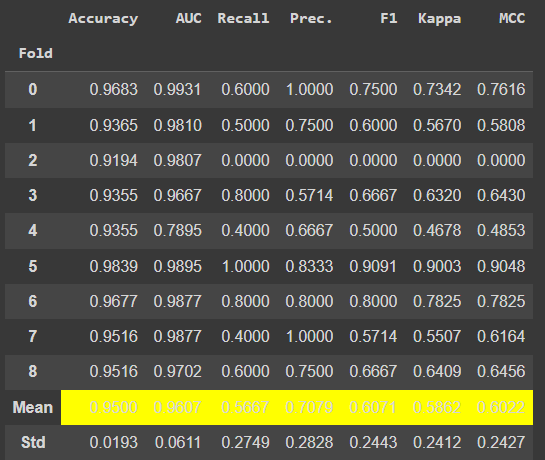

In [ ]:
tuned_knn_model = tune_model(knn_model, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9732,0.9898,0.8889,0.8000,0.8421,0.8275,0.8289
1,0.9732,0.9946,0.6667,1.0000,0.8000,0.7863,0.8049
2,0.9554,0.9234,0.6667,0.7500,0.7059,0.6818,0.6832
3,0.9821,0.9968,1.0000,0.8182,0.9000,0.8903,0.8957
4,0.9375,0.9819,0.5000,0.7143,0.5882,0.5556,0.5659
Mean,0.9643,0.9773,0.7444,0.8165,0.7672,0.7483,0.7557
Std,0.0160,0.0274,0.1778,0.0988,0.1096,0.1179,0.1172


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


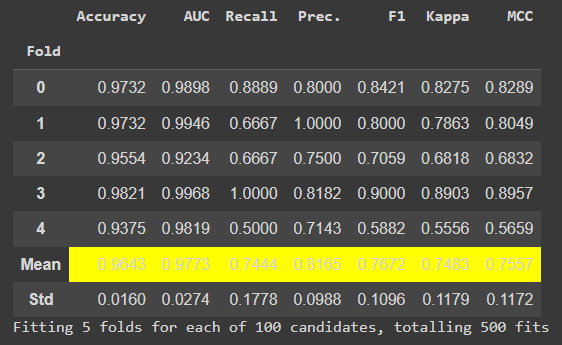

## Evaluación del Modelo:

In [ ]:
evaluate_model(tuned_knn_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

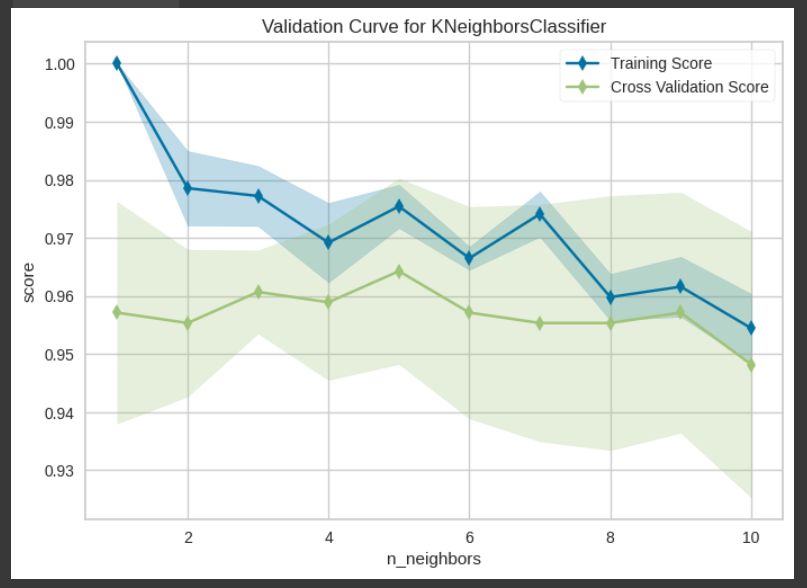

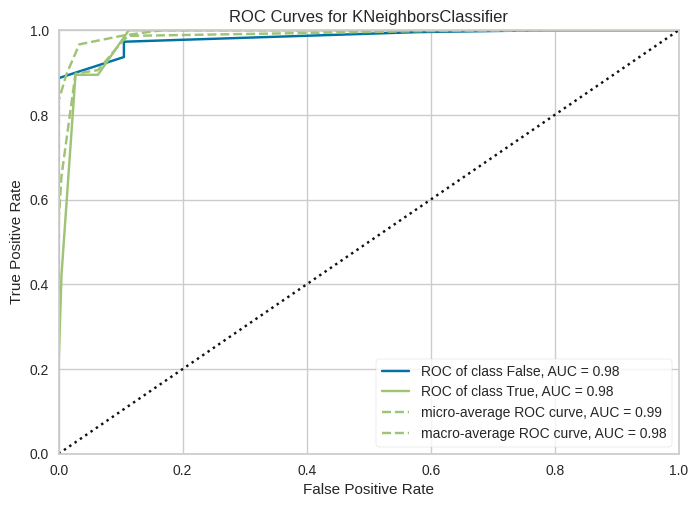

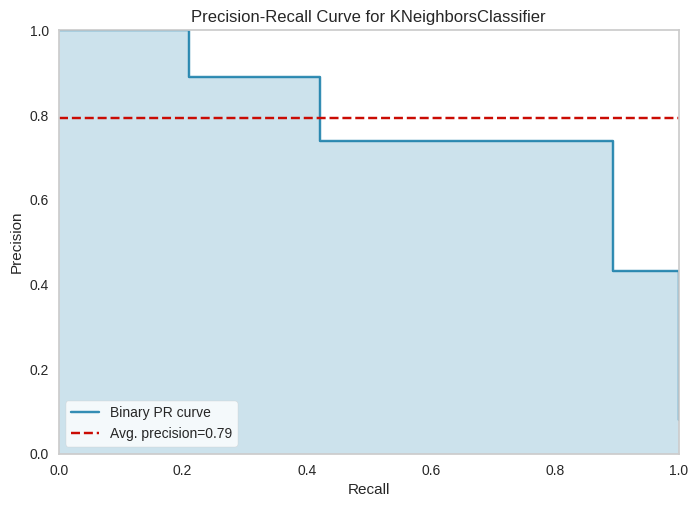

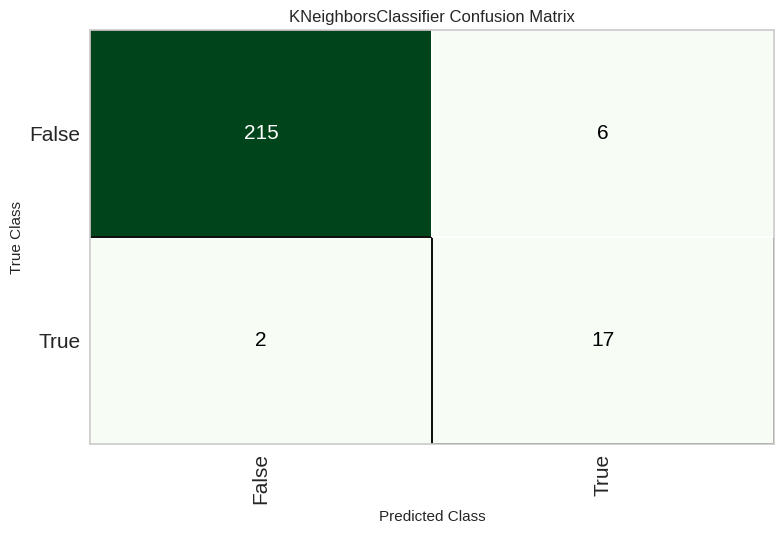

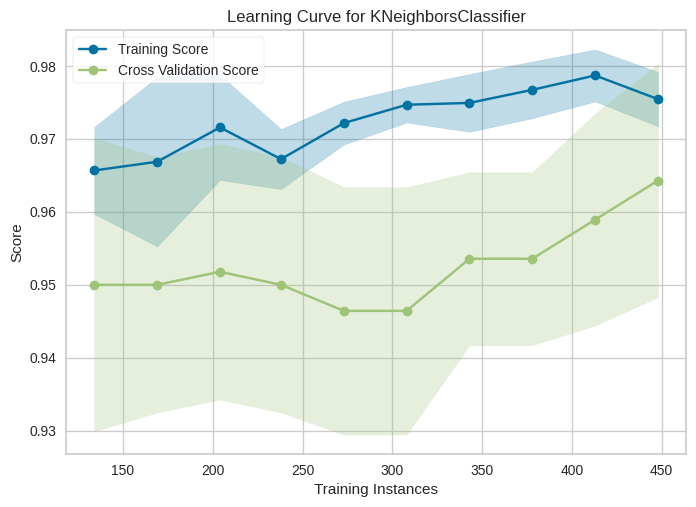

In [ ]:
plot_model(tuned_knn_model, 'auc')
plot_model(tuned_knn_model, 'pr')
plot_model(tuned_knn_model, 'confusion_matrix')
plot_model(tuned_knn_model, 'learning')


Dentro de las métricas evaluadas se obtiene lo siguiente:
lo mejores parámetros fueron


1.   Distancia: Manhattan
2.   K:5
3.   pesos:uniforme

de la matriz de confusión se consigue ver que en su mayoría clasifica de manera correcta los Pokémon, así mismo la curva ROC muestra que su desempeño es del 0.98.

Por otra parte, se evidencia que en entrenamiento el mejor desempeño se tiene en 1 vecino más cercano, mientras que al usar cross validación el mejor es 5 vecinos.

Finalmente, de la curva de aprendizaje es notorio que entre más datos se emplean, el modelo se fortalece y beneficia de la información, tanto en cross validación como en entrenamiento.



## Interpretación del modelo

De la gráfica se logra entender que las características que más influyen en la clasificación son: el total de puntos, el número del Pokémon y su velocidad de ataque y el ataque.

In [ ]:
interpret_model(tuned_knn_model,plot='pfi')

9it [00:00, 30.97it/s]


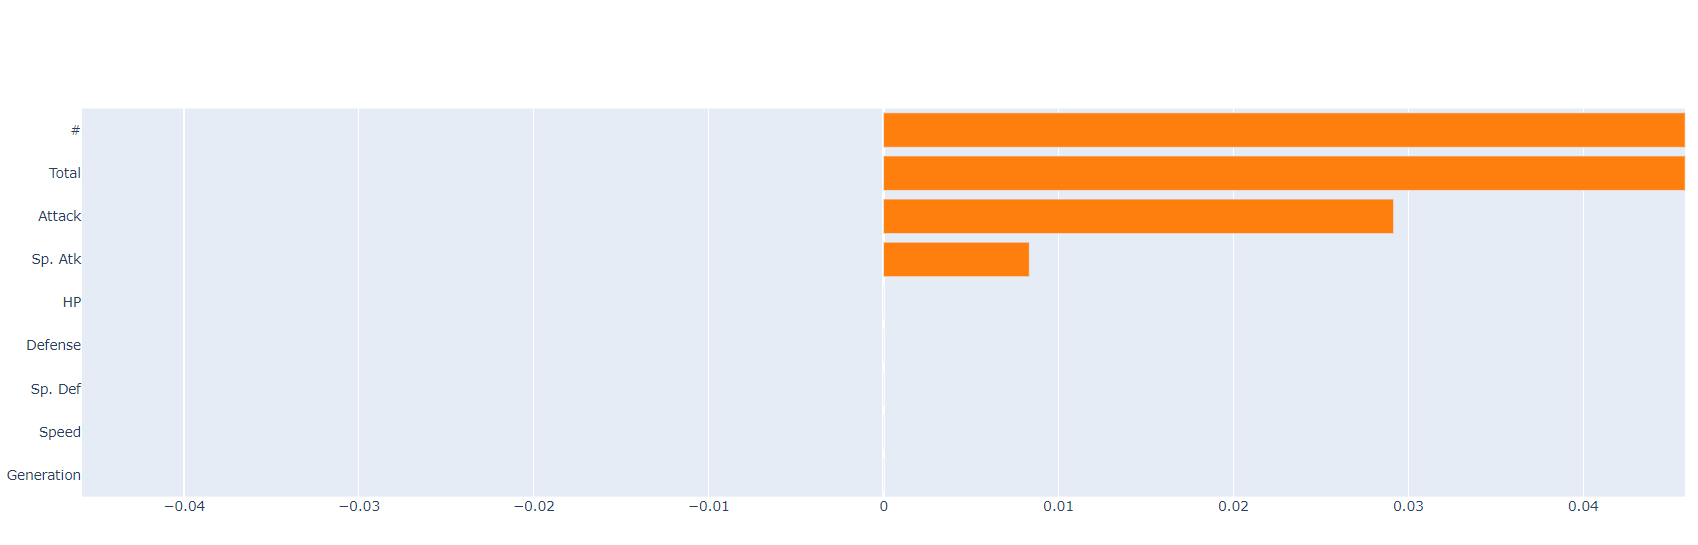

## Predicciones

In [ ]:
    #'Name': 'Rowlet',
   # 'Type 1': 'Grass',
   # 'Type 2': 'Flying',
new_pokemon = {
    '#': 722,
    'Total': 320,
    'HP': 68,
    'Attack': 55,
    'Defense': 55,
    'Sp. Atk': 50,
    'Sp. Def': 50,
    'Speed': 42,
    'Generation': 7
}

import pandas as pd
new_pokemon_df = pd.DataFrame([new_pokemon])
prediction = tuned_knn_model.predict(new_pokemon_df)
legendary_status = prediction[0]
print(f"¿Es el Pokémon legendario? {legendary_status}")

¿Es el Pokémon legendario? False


In [ ]:
     # 'Name': 'Solgaleo',
    #'Type 1': 'Psychic',
    #'Type 2': 'Steel'
new_pokemon = {
    '#': 791,
    'Total': 680,
    'HP': 137,
    'Attack': 137,
    'Defense': 107,
    'Sp. Atk': 113,
    'Sp. Def': 89,
    'Speed': 97,
    'Generation': 7
}

import pandas as pd
new_pokemon_df = pd.DataFrame([new_pokemon])
prediction = tuned_knn_model.predict(new_pokemon_df)
legendary_status = prediction[0]
print(f"¿Es el Pokémon legendario? {legendary_status}")

¿Es el Pokémon legendario? True


## Finalización del modelo

In [ ]:
from pycaret.classification import  finalize_model,save_model
final_tuned_knn_model = finalize_model(tuned_knn_model)
save_model(final_tuned_knn_model, 'final_tuned_knn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Total', '#', 'HP', 'Attack',
                                              'Defense', 'Sp. Atk', 'Sp. Def',
                                              'Speed'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',...
                                    

In [ ]:
import pickle
with open('final_tuned_knn_model.pkl', 'wb') as file:
    pickle.dump(final_tuned_knn_model, file)

In [ ]:
with open('final_tuned_knn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
    #'Name': 'Koraidon',
    #'Type 1': 'Fighting',
    #'Type 2': 'Dragon',
new_pokemon = {
    '#': 1007,
    'Total': 670,
    'HP': 100,
    'Attack': 135,
    'Defense': 115,
    'Sp. Atk': 85,
    'Sp. Def': 100,
    'Speed': 135,
    'Generation': 7
}
import pandas as pd
new_pokemon_df = pd.DataFrame([new_pokemon])
prediction = loaded_model.predict(new_pokemon_df)
legendary_status = prediction[0]
print(f"¿Es el Pokémon legendario? {legendary_status}")

¿Es el Pokémon legendario? True


In [ ]:
    #'Name': 'Incineroar',
    #'Type 1': 'Fire',
    #'Type 2': 'Dark',
new_pokemon = {
    '#': 727,
    'Total': 530,
    'HP': 95,
    'Attack': 115,
    'Defense': 90,
    'Sp. Atk': 80,
    'Sp. Def': 90,
    'Speed': 60,
    'Generation': 7
}
import pandas as pd
new_pokemon_df = pd.DataFrame([new_pokemon])
prediction = loaded_model.predict(new_pokemon_df)
legendary_status = prediction[0]
print(f"¿Es el Pokémon legendario? {legendary_status}")

¿Es el Pokémon legendario? False


# Conclusiones
* Al comparar las métricas de rendimiento de los clasificadores, es evidente que KNN no es el mejor en todas las métricas, pero en general no tiene un mal desempeño, todas sus métricas están por encima del 50%.

* Ya al crear el modelo de KNN se evidencia una mejora en las métricas y mejoran aún más luego del proceso de optimización, dejando todos sus valores por encima del 70%.

*  A medida que se aumenta la cantidad de vecinos el desempeño disminuye, el mejor caso se tiene para entrenamiento en 1 y en cross validación en 5.

* El clasificador generado cumple con su función, los Pokémon ingresados los clasifico en donde corresponde.